## SenseBox data analysis exercise
Summer 2022

### Index

[1. Objective](#21)<br>
[2. Methodology](#22)<br>
&emsp;[2.1 API Request](#221)<br>
&emsp;[2.2 SQL query questions](#222SQL)<br>
&emsp;[2.3 Data Analysis](#223data)<br>
[3. Conclusions](#23)<br>


### <a id="21">1. Objective</a>

- _The goal of the exercise is to first obtain data from APIs with `requests`, organise and store it in a `SQLite` database, and then examine and present the topic through computations and visualisations._
- Collect data from sensebox devices and review which information is available, how is the structure of this information and how can it be use in real life scenarios.




### <a id="22">2. Methodology</a>
#### <a id="221">2.1 API Request</a>

_Read through this [list](https://github.com/public-apis/public-apis) of APIs mentioned in the lecture and choose any of the API(s) which you are particularly interested in (if you find a relevant API not contained in this list, that is of course also fine). Make sure that the API(s) you choose contain sufficient data for an analysis later on. Obtain the relevant data from your chosen API(s) __through Python__ with `requests` rather than pre-built libraries. Then process the data with the typical `pandas` functionalities etc._

### Sensebox API

Sensebox are a set of technological tools to monitor outdoor areas. By combining different types of sensors, data related to humidity, temperature, sunlight and others can be extracted. The project started at the University of Münster at the Institute for Geoinformatics, and evolved to an organization interested in enviromental protection and STEAM education supported by the German goverment [1]. It currently has more than 10.000 senseBoxes around the world as displayed in Figure 2.1, reporting data from different locations to a main server. Users acquire the sensors they are interested in, implement the code and start reporting. Figure 2.2 display a Sensebox Kit.


![Senseboxmap](images/senseboxmap.png)
_Figure 2.1. World Map with senseBox kits installed_

![Sensebox](images/sensebox.png)

_Figure 2.2. senseBox Kit_

The documentation for the openSenseMap is detailed in their [website](). We are interested on collecting data from the available sensors in the NRW area for phenomenon such as temperature, humidity and UV intensity. The API limits the request to 10000 measurements per device for an specific timeframe. The API data is open to anyone to be downloaded, thus we are not required to configure authentication keys.

In [5]:
import requests
import pandas as pd
import numpy as np


In [6]:
params = {"date": "2022-06-01T00:00:00.00Z", "phenomenon":"temperature"}
r = requests.get("https://api.opensensemap.org/boxes/",
                        params=params)

In [7]:
data_sensebox = r.json()

In [8]:
# Transform JSON request to Dataframes
df_sensebox=pd.DataFrame(data_sensebox)
df_sensebox.head()

,_id,createdAt,updatedAt,name,grouptag,exposure,sensors,model,currentLocation,lastMeasurementAt,loc,description,image,weblink
0,59721243fe1c7400113446fc,2022-03-30T11:25:43.328Z,2025-01-13T18:14:32.268Z,M_Office_1,[Sofia],indoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_bme280,"{'type': 'Point', 'coordinates': [23.405557, 4...",2025-01-13T18:14:32.264Z,"[{'geometry': {'type': 'Point', 'coordinates':...",NaN,NaN,NaN
1,5aa71abe396417001bdfe04a,2022-03-30T11:25:43.506Z,2025-01-11T06:26:40.394Z,2xBME280,[],indoor,"[{'_id': '5acf38d3223bd80019665ffa', 'title': ...",luftdaten_sds011_bme280,"{'type': 'Point', 'coordinates': [23.359771, 4...",2025-01-11T06:26:40.384Z,"[{'geometry': {'type': 'Point', 'coordinates':...",Internal and external BME280 sensors,NaN,NaN
2,5cfe042fa1ba9f001afb0480,2022-03-30T11:25:43.734Z,2024-04-07T18:52:26.653Z,ph1m_dust,[],outdoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_dht22,"{'timestamp': '2019-06-10T07:18:07.267Z', 'coo...",2024-04-07T18:52:26.648Z,[{'geometry': {'timestamp': '2019-06-10T07:18:...,NaN,5cfe042fa1ba9f001afb0480_pswglm.jpg,http://ph1m.nl
3,5d754c46953683001a37a1ce,2022-03-30T11:25:43.763Z,2025-01-13T18:07:48.883Z,B13,[],outdoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_bme280,"{'timestamp': '2019-09-08T18:45:26.684Z', 'coo...",2025-01-13T18:07:48.874Z,[{'geometry': {'timestamp': '2019-09-08T18:45:...,NaN,NaN,NaN
4,5f599d98e26476001c3e821e,2022-03-30T11:25:43.888Z,2022-10-13T17:44:14.425Z,PDX_GrantPark,[luftdaten.info],outdoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_dht22,"{'timestamp': '2020-09-10T03:29:28.238Z', 'coo...",2022-10-13T17:44:14.421Z,[{'geometry': {'timestamp': '2020-09-10T03:29:...,NaN,NaN,NaN


In [9]:
df_sensebox.shape

(13, 14)

We drop the columns that are not necessary for our analysis and/or are redundant in other data columns.

In [10]:
df_sensebox.columns

Index(['_id', 'createdAt', 'updatedAt', 'name', 'grouptag', 'exposure',
       'sensors', 'model', 'currentLocation', 'lastMeasurementAt', 'loc',
       'description', 'image', 'weblink'],
      dtype='object')

In [11]:
# organized dataframe
df_sensebox.drop(columns=['grouptag', 'image','weblink','description'], axis=1, inplace=True)
df_sensebox.rename(columns={'_id':'id_sensebox'}, inplace=True)

In the dataframe, we can identify columns with information that will be better analysed with their own table such as the column _sensor_. The column _currentLocation_ will also be better suited to have separated columns in the main dataframe. For extracting the coordinates values, we extract the key from the dictionary in the column with some list comprehension.

In [12]:
df_sensebox['longitud']=pd.Series(d.get('coordinates')[0] for d in df_sensebox.currentLocation).values
df_sensebox['latitud']=pd.Series(d.get('coordinates')[1] for d in df_sensebox.currentLocation).values
df_sensebox['coordinates']=pd.Series(d.get('coordinates') for d in df_sensebox.currentLocation).values

df_sensebox

,id_sensebox,createdAt,updatedAt,name,exposure,sensors,model,currentLocation,lastMeasurementAt,loc,longitud,latitud,coordinates
0,59721243fe1c7400113446fc,2022-03-30T11:25:43.328Z,2025-01-13T18:14:32.268Z,M_Office_1,indoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_bme280,"{'type': 'Point', 'coordinates': [23.405557, 4...",2025-01-13T18:14:32.264Z,"[{'geometry': {'type': 'Point', 'coordinates':...",23.405557,42.636516,"[23.405557, 42.636516]"
1,5aa71abe396417001bdfe04a,2022-03-30T11:25:43.506Z,2025-01-11T06:26:40.394Z,2xBME280,indoor,"[{'_id': '5acf38d3223bd80019665ffa', 'title': ...",luftdaten_sds011_bme280,"{'type': 'Point', 'coordinates': [23.359771, 4...",2025-01-11T06:26:40.384Z,"[{'geometry': {'type': 'Point', 'coordinates':...",23.359771,42.700230,"[23.359771, 42.70023]"
2,5cfe042fa1ba9f001afb0480,2022-03-30T11:25:43.734Z,2024-04-07T18:52:26.653Z,ph1m_dust,outdoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_dht22,"{'timestamp': '2019-06-10T07:18:07.267Z', 'coo...",2024-04-07T18:52:26.648Z,[{'geometry': {'timestamp': '2019-06-10T07:18:...,4.510325,52.222357,"[4.510325, 52.222357, 1]"
3,5d754c46953683001a37a1ce,2022-03-30T11:25:43.763Z,2025-01-13T18:07:48.883Z,B13,outdoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_bme280,"{'timestamp': '2019-09-08T18:45:26.684Z', 'coo...",2025-01-13T18:07:48.874Z,[{'geometry': {'timestamp': '2019-09-08T18:45:...,8.822279,53.076957,"[8.822279, 53.076957]"
4,5f599d98e26476001c3e821e,2022-03-30T11:25:43.888Z,2022-10-13T17:44:14.425Z,PDX_GrantPark,outdoor,"[{'title': 'PM10', 'unit': 'µg/m³', 'sensorTyp...",luftdaten_sds011_dht22,"{'timestamp': '2020-09-10T03:29:28.238Z', 'coo...",2022-10-13T17:44:14.421Z,[{'geometry': {'timestamp': '2020-09-10T03:29:...,-122.631289,45.539658,"[-122.631289, 45.539658, -4.5]"
5,5f63b16f5189f4001bf880d8,2022-03-30T11:25:43.890Z,2022-07-26T13:18:20.849Z,Malya_1,outdoor,"[{'icon': 'osem-cloud', 'title': 'PM2.5', 'uni...",custom,"{'timestamp': '2020-09-17T18:56:47.001Z', 'coo...",2022-07-26T13:18:20.845Z,[{'geometry': {'timestamp': '2020-09-17T18:56:...,30.623199,50.461063,"[30.623199, 50.461063, 137]"
6,5fe1f274c31ca0001c930586,2020-12-22T13:19:48.278Z,2025-01-13T18:16:13.854Z,FijnstofHelden,outdoor,"[{'icon': 'osem-thermometer', 'title': 'temper...",custom,"{'timestamp': '2020-12-22T13:19:48.273Z', 'coo...",2025-01-13T18:16:13.791Z,[{'geometry': {'timestamp': '2020-12-22T13:19:...,5.988284,51.317900,"[5.988284, 51.3179, 34]"
7,6079b79916aef4001b9fb977,2022-03-30T11:25:43.933Z,2023-09-22T12:30:25.352Z,TUDo_CNI_SCS_5,outdoor,"[{'title': 'temperature', 'sensorType': 'DS18B...",custom,"{'type': 'Point', 'coordinates': [7.441287, 51...",2023-09-22T12:30:25.344Z,"[{'geometry': {'type': 'Point', 'coordinates':...",7.441287,51.500407,"[7.441287, 51.500407]"
8,61a1dfebd85cc7001b4d04e3,2022-03-30T11:25:43.960Z,2025-01-13T18:09:41.699Z,ELSYS_EMS_PERRET_NEE,outdoor,"[{'icon': 'osem-temperature-celsius', 'title':...",custom,"{'timestamp': '2021-11-27T07:36:11.783Z', 'coo...",2025-01-13T18:09:41.695Z,[{'geometry': {'timestamp': '2021-11-27T07:36:...,5.735416,45.184907,"[5.735416, 45.184907, 300]"
9,61a223c64a7833001b3fcf09,2022-03-30T11:25:43.960Z,2022-12-13T03:57:14.925Z,MCF88_LW12TERPM_SMH,outdoor,"[{'icon': 'osem-thermometer', 'title': 'temper...",custom,"{'type': 'Point', 'coordinates': [5.753862, 45...",2022-12-13T03:57:14.919Z,"[{'geometry': {'type': 'Point', 'coordinates':...",5.753862,45.184780,"[5.753862, 45.18478, 240]"


Next, we separate the information of the sensors per senseBox station to access easier to them. The values in the column _sensors_ will be populating a new table, taking the value of the `id_sensebox` with them to proceed with a relational database architecture.

In [13]:
df_sensors=pd.DataFrame()

for ind in df_sensebox.index:

    _df=pd.DataFrame(df_sensebox.sensors[ind])

    try: 
        _df['m_value']=pd.Series(d.get('value') for d in _df.lastMeasurement ).values
        _df['m_date']=pd.Series(d.get('createdAt') for d in _df.lastMeasurement ).values
    except AttributeError:
        _df['m_value']=0
        _df['m_date']=None

    _df['id_sensebox']=df_sensebox.id_sensebox[ind]
    df_sensors=pd.concat([df_sensors,_df], ignore_index=True)

df_sensors.head()

,title,unit,sensorType,icon,_id,lastMeasurement,m_value,m_date,id_sensebox
0,PM10,µg/m³,SDS 011,osem-cloud,59721243fe1c740011344701,"{'value': '4.00', 'createdAt': '2023-10-03T13:...",4.00,2023-10-03T13:01:16.694Z,59721243fe1c7400113446fc
1,PM2.5,µg/m³,SDS 011,osem-cloud,59721243fe1c740011344700,"{'value': '2.23', 'createdAt': '2023-10-03T13:...",2.23,2023-10-03T13:01:16.694Z,59721243fe1c7400113446fc
2,Temperatur,°C,BME280,osem-thermometer,59721243fe1c7400113446ff,"{'createdAt': '2025-01-13T18:14:32.264Z', 'val...",23.39,2025-01-13T18:14:32.264Z,59721243fe1c7400113446fc
3,rel. Luftfeuchte,%,BME280,osem-humidity,59721243fe1c7400113446fe,"{'createdAt': '2025-01-13T18:14:32.264Z', 'val...",29.73,2025-01-13T18:14:32.264Z,59721243fe1c7400113446fc
4,Luftdruck,Pa,BME280,osem-barometer,59721243fe1c7400113446fd,"{'value': '95091.63', 'createdAt': '2022-06-01...",95091.63,2022-06-01T03:57:35.828Z,59721243fe1c7400113446fc


We remove spaces in the _sensorType_ Column

In [14]:
df_sensors['sensorType']=df_sensors['sensorType'].str.replace(" ","")

We unify the variables measured by the sensors as they have different string chains for the same value:

In [15]:
df_sensors.title.unique()

array(['PM10', 'PM2.5', 'Temperatur', 'rel. Luftfeuchte', 'Luftdruck',
       'temperature', 'humidity', 'pressure', 'Pressure', 'presure',
       'MP10', 'MP2.5', 'light', 'PM2_5', 'motion', 'battery', 'fCnt',
       'pm1', 'pm25', 'pm10', 'dewpoint', 'rel. humidity',
       'barometric pressure', 'fine particle matter PM2.5',
       'fine particle matter PM10.0', 'radioactivety'], dtype=object)

In [16]:
dict_var={
    'PM10':('MP10','pm1','pm10', 'fine particle matter PM10.0'),
    'PM2.5':('MP2.5','PM2_5','pm25','fine particle matter PM2.5'), 
    'Temperature':('Temperatur','temperature'),
    'Pressure':('pressure', 'presure', 'barometric pressure','Luftdruck'),
    'Humidity':('humidity', 'rel. humidity', 'rel. Luftfeuchte')
}

for index in dict_var:
    df_sensors['title']=np.where(df_sensors['title'].isin(dict_var[index]), index, df_sensors['title'])

In [17]:
df_sensors.title.head()

0           PM10
1          PM2.5
2    Temperature
3       Humidity
4       Pressure
Name: title, dtype: object

Finally, we setup the indexes for each table to integrate the relational database paradigm of primary key. In this case, the primary key will be related to the sensebox identificator. We should remove the columns with dictionaries, series and list as it is not supported by the `SQLite` library.

In [18]:
df_sensors.drop(columns=['lastMeasurement'], axis=1, inplace=True)
df_sensors.set_index('id_sensebox')

,title,unit,sensorType,icon,_id,m_value,m_date
id_sensebox,,,,,,,
59721243fe1c7400113446fc,PM10,µg/m³,SDS011,osem-cloud,59721243fe1c740011344701,4.00,2023-10-03T13:01:16.694Z
59721243fe1c7400113446fc,PM2.5,µg/m³,SDS011,osem-cloud,59721243fe1c740011344700,2.23,2023-10-03T13:01:16.694Z
59721243fe1c7400113446fc,Temperature,°C,BME280,osem-thermometer,59721243fe1c7400113446ff,23.39,2025-01-13T18:14:32.264Z
59721243fe1c7400113446fc,Humidity,%,BME280,osem-humidity,59721243fe1c7400113446fe,29.73,2025-01-13T18:14:32.264Z
59721243fe1c7400113446fc,Pressure,Pa,BME280,osem-barometer,59721243fe1c7400113446fd,95091.63,2022-06-01T03:57:35.828Z
...,...,...,...,...,...,...,...
6251b7ead7e732001b3a3315,Humidity,%,DHT22,osem-humidity,6251b7ead7e732001b3a331a,99.90001,2025-01-11T06:30:56.091Z
6251b7ead7e732001b3a3315,Pressure,hPa,BMP180,osem-barometer,6251b7ead7e732001b3a3319,1010.602,2025-01-11T06:30:56.091Z
6251b7ead7e732001b3a3315,PM2.5,µg/m³,SDS011,osem-cloud,6251b7ead7e732001b3a3318,2.6,2022-06-01T03:58:15.535Z


In [19]:
df_sensebox.drop(columns=['sensors','currentLocation','coordinates','loc'], axis=1, inplace=True)
df_sensebox.set_index('id_sensebox')

,createdAt,updatedAt,name,exposure,model,lastMeasurementAt,longitud,latitud
id_sensebox,,,,,,,,
59721243fe1c7400113446fc,2022-03-30T11:25:43.328Z,2025-01-13T18:14:32.268Z,M_Office_1,indoor,luftdaten_sds011_bme280,2025-01-13T18:14:32.264Z,23.405557,42.636516
5aa71abe396417001bdfe04a,2022-03-30T11:25:43.506Z,2025-01-11T06:26:40.394Z,2xBME280,indoor,luftdaten_sds011_bme280,2025-01-11T06:26:40.384Z,23.359771,42.700230
5cfe042fa1ba9f001afb0480,2022-03-30T11:25:43.734Z,2024-04-07T18:52:26.653Z,ph1m_dust,outdoor,luftdaten_sds011_dht22,2024-04-07T18:52:26.648Z,4.510325,52.222357
5d754c46953683001a37a1ce,2022-03-30T11:25:43.763Z,2025-01-13T18:07:48.883Z,B13,outdoor,luftdaten_sds011_bme280,2025-01-13T18:07:48.874Z,8.822279,53.076957
5f599d98e26476001c3e821e,2022-03-30T11:25:43.888Z,2022-10-13T17:44:14.425Z,PDX_GrantPark,outdoor,luftdaten_sds011_dht22,2022-10-13T17:44:14.421Z,-122.631289,45.539658
5f63b16f5189f4001bf880d8,2022-03-30T11:25:43.890Z,2022-07-26T13:18:20.849Z,Malya_1,outdoor,custom,2022-07-26T13:18:20.845Z,30.623199,50.461063
5fe1f274c31ca0001c930586,2020-12-22T13:19:48.278Z,2025-01-13T18:16:13.854Z,FijnstofHelden,outdoor,custom,2025-01-13T18:16:13.791Z,5.988284,51.317900
6079b79916aef4001b9fb977,2022-03-30T11:25:43.933Z,2023-09-22T12:30:25.352Z,TUDo_CNI_SCS_5,outdoor,custom,2023-09-22T12:30:25.344Z,7.441287,51.500407
61a1dfebd85cc7001b4d04e3,2022-03-30T11:25:43.960Z,2025-01-13T18:09:41.699Z,ELSYS_EMS_PERRET_NEE,outdoor,custom,2025-01-13T18:09:41.695Z,5.735416,45.184907


#### <a id="222SQL">2.2 SQL query questions</a>

_Create a `SQLite` database (see `01-sqlite-database.ipynb` from Unit 7 as a reference), and store at least two tables in a well structured and thought through relational database (no need to store any data in the database that you do not need in your subsequent analysis)._

To create a SQLite database, we start by importing the relevant libraries:

In [20]:
import sqlite3
import pandas as pd
import os

Our data will be populated by the dataframes `df_sensebox` and `df_sensors`.

In [21]:
db = sqlite3.connect("sensebox-db.sqlite")

In [22]:
df_sensebox

,id_sensebox,createdAt,updatedAt,name,exposure,model,lastMeasurementAt,longitud,latitud
0,59721243fe1c7400113446fc,2022-03-30T11:25:43.328Z,2025-01-13T18:14:32.268Z,M_Office_1,indoor,luftdaten_sds011_bme280,2025-01-13T18:14:32.264Z,23.405557,42.636516
1,5aa71abe396417001bdfe04a,2022-03-30T11:25:43.506Z,2025-01-11T06:26:40.394Z,2xBME280,indoor,luftdaten_sds011_bme280,2025-01-11T06:26:40.384Z,23.359771,42.700230
2,5cfe042fa1ba9f001afb0480,2022-03-30T11:25:43.734Z,2024-04-07T18:52:26.653Z,ph1m_dust,outdoor,luftdaten_sds011_dht22,2024-04-07T18:52:26.648Z,4.510325,52.222357
3,5d754c46953683001a37a1ce,2022-03-30T11:25:43.763Z,2025-01-13T18:07:48.883Z,B13,outdoor,luftdaten_sds011_bme280,2025-01-13T18:07:48.874Z,8.822279,53.076957
4,5f599d98e26476001c3e821e,2022-03-30T11:25:43.888Z,2022-10-13T17:44:14.425Z,PDX_GrantPark,outdoor,luftdaten_sds011_dht22,2022-10-13T17:44:14.421Z,-122.631289,45.539658
5,5f63b16f5189f4001bf880d8,2022-03-30T11:25:43.890Z,2022-07-26T13:18:20.849Z,Malya_1,outdoor,custom,2022-07-26T13:18:20.845Z,30.623199,50.461063
6,5fe1f274c31ca0001c930586,2020-12-22T13:19:48.278Z,2025-01-13T18:16:13.854Z,FijnstofHelden,outdoor,custom,2025-01-13T18:16:13.791Z,5.988284,51.317900
7,6079b79916aef4001b9fb977,2022-03-30T11:25:43.933Z,2023-09-22T12:30:25.352Z,TUDo_CNI_SCS_5,outdoor,custom,2023-09-22T12:30:25.344Z,7.441287,51.500407
8,61a1dfebd85cc7001b4d04e3,2022-03-30T11:25:43.960Z,2025-01-13T18:09:41.699Z,ELSYS_EMS_PERRET_NEE,outdoor,custom,2025-01-13T18:09:41.695Z,5.735416,45.184907
9,61a223c64a7833001b3fcf09,2022-03-30T11:25:43.960Z,2022-12-13T03:57:14.925Z,MCF88_LW12TERPM_SMH,outdoor,custom,2022-12-13T03:57:14.919Z,5.753862,45.184780


In [23]:
df_sensebox.to_sql("sensebox",db, if_exists="replace")
pd.read_sql("SELECT * FROM sensebox LIMIT 5", db)

,index,id_sensebox,createdAt,updatedAt,name,exposure,model,lastMeasurementAt,longitud,latitud
0,0,59721243fe1c7400113446fc,2022-03-30T11:25:43.328Z,2025-01-13T18:14:32.268Z,M_Office_1,indoor,luftdaten_sds011_bme280,2025-01-13T18:14:32.264Z,23.405557,42.636516
1,1,5aa71abe396417001bdfe04a,2022-03-30T11:25:43.506Z,2025-01-11T06:26:40.394Z,2xBME280,indoor,luftdaten_sds011_bme280,2025-01-11T06:26:40.384Z,23.359771,42.700230
2,2,5cfe042fa1ba9f001afb0480,2022-03-30T11:25:43.734Z,2024-04-07T18:52:26.653Z,ph1m_dust,outdoor,luftdaten_sds011_dht22,2024-04-07T18:52:26.648Z,4.510325,52.222357
3,3,5d754c46953683001a37a1ce,2022-03-30T11:25:43.763Z,2025-01-13T18:07:48.883Z,B13,outdoor,luftdaten_sds011_bme280,2025-01-13T18:07:48.874Z,8.822279,53.076957
4,4,5f599d98e26476001c3e821e,2022-03-30T11:25:43.888Z,2022-10-13T17:44:14.425Z,PDX_GrantPark,outdoor,luftdaten_sds011_dht22,2022-10-13T17:44:14.421Z,-122.631289,45.539658


In [24]:
df_sensors.to_sql("sensors",db, if_exists="replace")
pd.read_sql("SELECT * FROM sensors LIMIT 5", db)

,index,title,unit,sensorType,icon,_id,m_value,m_date,id_sensebox
0,0,PM10,µg/m³,SDS011,osem-cloud,59721243fe1c740011344701,4.00,2023-10-03T13:01:16.694Z,59721243fe1c7400113446fc
1,1,PM2.5,µg/m³,SDS011,osem-cloud,59721243fe1c740011344700,2.23,2023-10-03T13:01:16.694Z,59721243fe1c7400113446fc
2,2,Temperature,°C,BME280,osem-thermometer,59721243fe1c7400113446ff,23.39,2025-01-13T18:14:32.264Z,59721243fe1c7400113446fc
3,3,Humidity,%,BME280,osem-humidity,59721243fe1c7400113446fe,29.73,2025-01-13T18:14:32.264Z,59721243fe1c7400113446fc
4,4,Pressure,Pa,BME280,osem-barometer,59721243fe1c7400113446fd,95091.63,2022-06-01T03:57:35.828Z,59721243fe1c7400113446fc


c) Answer the following questions (i)-(iv) with SQL queries through `pd.read_sql()`:

&emsp;&ensp; (i) Return the column names of each table.

In [25]:
# Table senseBox
pd.read_sql("SELECT * FROM sensebox LIMIT 5", db).columns.tolist()

['index',
 'id_sensebox',
 'createdAt',
 'updatedAt',
 'name',
 'exposure',
 'model',
 'lastMeasurementAt',
 'longitud',
 'latitud']

In [26]:
# Table sensors
pd.read_sql("SELECT * FROM sensors LIMIT 5", db).columns.tolist()

['index',
 'title',
 'unit',
 'sensorType',
 'icon',
 '_id',
 'm_value',
 'm_date',
 'id_sensebox']

&emsp;&ensp; (ii) Return the total rows of each table. 

In [27]:
# Table senseBox
pd.read_sql("SELECT COUNT(*) as sensebox_total_rows FROM sensebox", db)

,sensebox_total_rows
0,13


In [28]:
# Table sensors
pd.read_sql("SELECT COUNT(*) as sensors_total_rows FROM sensors", db)

,sensors_total_rows
0,72


&emsp;&ensp; (iii) Return the first five rows of each table.

In [29]:
# Table senseBox
pd.read_sql("SELECT * FROM sensebox LIMIT 5;", db)

,index,id_sensebox,createdAt,updatedAt,name,exposure,model,lastMeasurementAt,longitud,latitud
0,0,59721243fe1c7400113446fc,2022-03-30T11:25:43.328Z,2025-01-13T18:14:32.268Z,M_Office_1,indoor,luftdaten_sds011_bme280,2025-01-13T18:14:32.264Z,23.405557,42.636516
1,1,5aa71abe396417001bdfe04a,2022-03-30T11:25:43.506Z,2025-01-11T06:26:40.394Z,2xBME280,indoor,luftdaten_sds011_bme280,2025-01-11T06:26:40.384Z,23.359771,42.700230
2,2,5cfe042fa1ba9f001afb0480,2022-03-30T11:25:43.734Z,2024-04-07T18:52:26.653Z,ph1m_dust,outdoor,luftdaten_sds011_dht22,2024-04-07T18:52:26.648Z,4.510325,52.222357
3,3,5d754c46953683001a37a1ce,2022-03-30T11:25:43.763Z,2025-01-13T18:07:48.883Z,B13,outdoor,luftdaten_sds011_bme280,2025-01-13T18:07:48.874Z,8.822279,53.076957
4,4,5f599d98e26476001c3e821e,2022-03-30T11:25:43.888Z,2022-10-13T17:44:14.425Z,PDX_GrantPark,outdoor,luftdaten_sds011_dht22,2022-10-13T17:44:14.421Z,-122.631289,45.539658


In [30]:
# Table sensors
pd.read_sql("SELECT * FROM sensors LIMIT 5", db)

,index,title,unit,sensorType,icon,_id,m_value,m_date,id_sensebox
0,0,PM10,µg/m³,SDS011,osem-cloud,59721243fe1c740011344701,4.00,2023-10-03T13:01:16.694Z,59721243fe1c7400113446fc
1,1,PM2.5,µg/m³,SDS011,osem-cloud,59721243fe1c740011344700,2.23,2023-10-03T13:01:16.694Z,59721243fe1c7400113446fc
2,2,Temperature,°C,BME280,osem-thermometer,59721243fe1c7400113446ff,23.39,2025-01-13T18:14:32.264Z,59721243fe1c7400113446fc
3,3,Humidity,%,BME280,osem-humidity,59721243fe1c7400113446fe,29.73,2025-01-13T18:14:32.264Z,59721243fe1c7400113446fc
4,4,Pressure,Pa,BME280,osem-barometer,59721243fe1c7400113446fd,95091.63,2022-06-01T03:57:35.828Z,59721243fe1c7400113446fc


&emsp;&ensp; (iv) Demonstrate which of the tables can be joined. Return __only__ the first five rows of the joined tables, 

In [31]:
pd.read_sql("SELECT sensors.id_sensebox,sensebox.id_sensebox, _id, sensorType  FROM sensors INNER JOIN sensebox ON sensors.id_sensebox=sensebox.id_sensebox LIMIT 5", db)

,id_sensebox,id_sensebox,_id,sensorType
0,59721243fe1c7400113446fc,59721243fe1c7400113446fc,59721243fe1c740011344701,SDS011
1,59721243fe1c7400113446fc,59721243fe1c7400113446fc,59721243fe1c740011344700,SDS011
2,59721243fe1c7400113446fc,59721243fe1c7400113446fc,59721243fe1c7400113446ff,BME280
3,59721243fe1c7400113446fc,59721243fe1c7400113446fc,59721243fe1c7400113446fe,BME280
4,59721243fe1c7400113446fc,59721243fe1c7400113446fc,59721243fe1c7400113446fd,BME280


&emsp;&ensp; and also return the total number of rows in the joined tables with a query.

In [32]:
pd.read_sql("SELECT count(*) as total_rows_joined_sensebox_sensors FROM sensors INNER JOIN sensebox ON sensors.id_sensebox=sensebox.id_sensebox", db)

,total_rows_joined_sensebox_sensors
0,72


#### <a id="223data">2.3 Data Analysis</a>

_Now query the database with SQL to obtain the data for your main analysis. All subsequent analysis can be done with packages such as `pandas` etc. from here on (no need to use SQL further). Discuss and illustrate your data with suitable packages, e.g. through visualisations, computations in tabular form, quantitative text analysis, statistical models, and/or written text._

As we have data related to the senseboxes location, we will visualize the map containing the coordinates. We select a pair of coordinates from the sensebox devices as the center of the map to illustrate the use of the map library.

In [33]:
sensebox_coor=pd.read_sql("SELECT longitud, latitud FROM sensebox", db)
center_map=(sensebox_coor['latitud'].mean(), sensebox_coor['longitud'].mean())

The map is displayed with the `ipyleaflet` library:

In [34]:
from ipyleaflet import Map, basemaps, Marker, MarkerCluster

m=Map(center = center_map, zoom = 5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.NASAGIBS.ViirsEarthAtNight2012)

m

Map(center=[48.25808684615386, 1.5391824615384615], controls=(ZoomControl(options=['position', 'zoom_in_text',…

We now add the location of each device to the map by using markers and cluster them from a maximun distance of 50km.

In [35]:
m2=Map(center = center_map, zoom = 3, min_zoom = 3, max_zoom = 7, 
    basemap=basemaps.Gaode.Satellite)

m2.add(
    MarkerCluster(
        markers=[
            Marker(location=(sensebox_coor['latitud'][index], sensebox_coor['longitud'][index]), draggable=False)
            for index in sensebox_coor.index
        ],
        disable_clustering_at_zoom=7,
        max_cluster_radius=50,
    )
)

m2

Map(center=[48.25808684615386, 1.5391824615384615], controls=(ZoomControl(options=['position', 'zoom_in_text',…

With the organized date, we proceed to answer the following questions:

In [45]:
# Adding libraries for the following analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

import numpy as np

__Which type of sensors are mostly used__ by the sensebox stations:

In [46]:
# Percentage of type of sensor used by the senseboxes
data_most_used_sensors=pd.read_sql("SELECT sensors.sensorType, count(sensors.sensorType) total_type FROM sensors INNER JOIN sensebox ON sensors.id_sensebox=sensebox.id_sensebox GROUP BY sensors.sensorType ORDER BY total_type ASC", db)

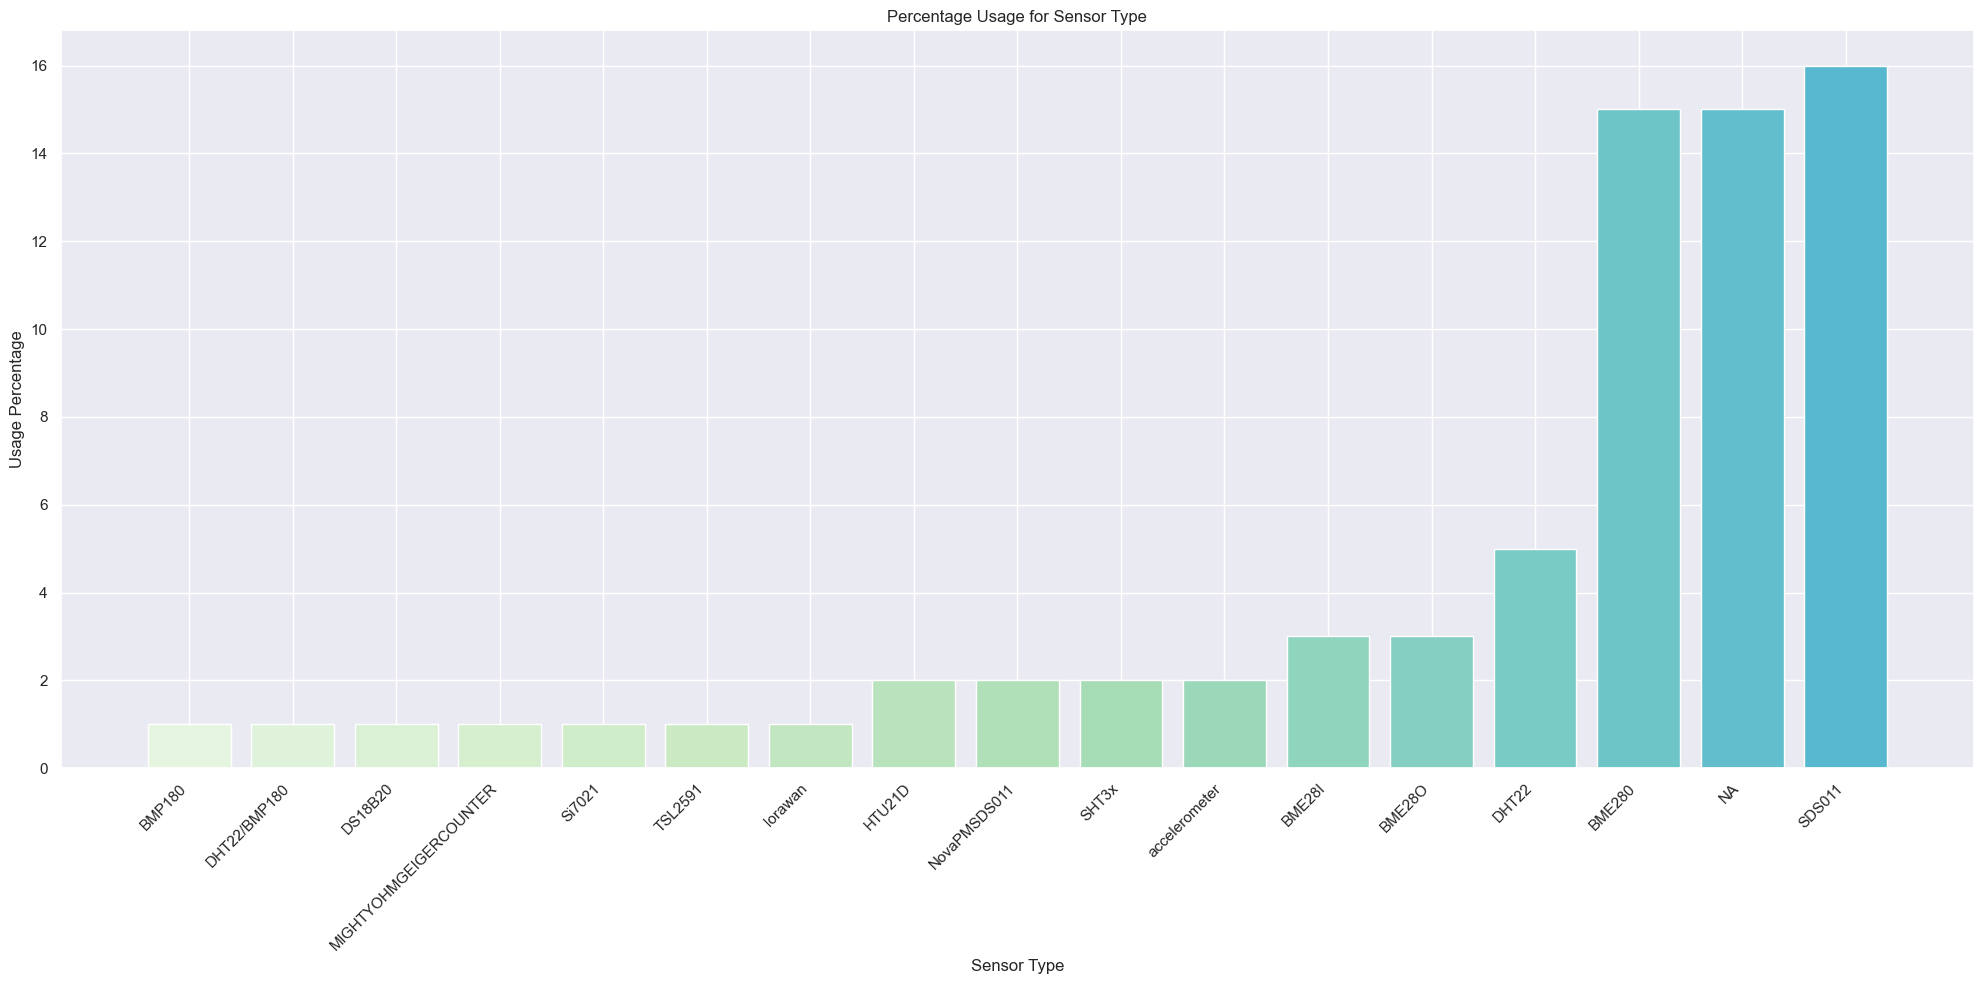

In [ ]:
labels = data_most_used_sensors['sensorType']
values = data_most_used_sensors['total_type']
cmap = plt.get_cmap('GnBu')
colors = list(cmap(np.linspace(0.1, 0.6, len(values))))

# Create bar plot
plt.bar(labels, values, color=colors)
plt.title('Percentage Usage for Sensor Type')
plt.xlabel('Sensor Type')
plt.ylabel('Usage Percentage')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


A more dynamic way to visualize the most popular sensors is by using word clouds:

In [54]:
import clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viole\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


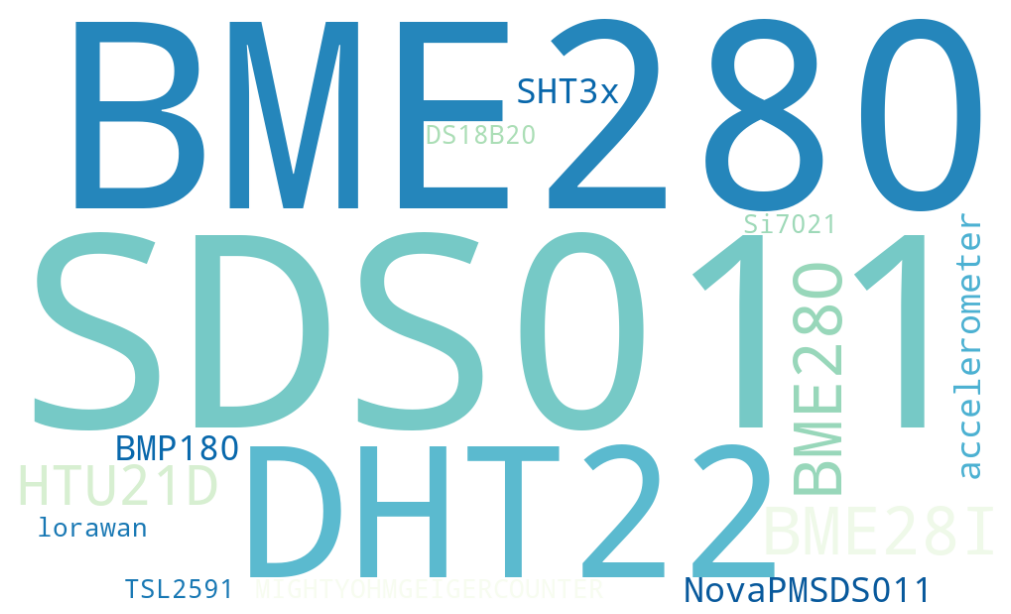

In [57]:
message = df_sensors["sensorType"]
clean_text.plot_word_cloud(input_string=" ".join(message),
                custom_words_to_remove=["na"], color_cloud="GnBu_r")

__How many sensors do most senseboxs have?__

In [58]:
data_total_sensors=pd.read_sql("SELECT sensebox.id_sensebox as id_sensebox, count(sensors.id_sensebox) as total_sensors FROM sensors INNER JOIN sensebox ON sensors.id_sensebox=sensebox.id_sensebox GROUP BY sensors.id_sensebox ORDER BY total_sensors DESC", db)

In [59]:
data_total_sensors

,id_sensebox,total_sensors
0,61a223c64a7833001b3fcf09,8
1,5d754c46953683001a37a1ce,7
2,59721243fe1c7400113446fc,7
3,6251b7ead7e732001b3a3315,6
4,5aa71abe396417001bdfe04a,6
5,61a49c884a7833001b5eda03,5
6,61a1dfebd85cc7001b4d04e3,5
7,6079b79916aef4001b9fb977,5
8,5fe1f274c31ca0001c930586,5
9,5f63b16f5189f4001bf880d8,5


In [64]:
data_total_sensors['total_sensors'].median()

5.0

Most senseseBox have around __5 sensors__.

__Which are the 5 sensebox that have most sensors?__

In [68]:
data_plot=pd.read_sql("SELECT sensebox.id_sensebox as id_sensebox, count(sensors.id_sensebox) as total_sensors FROM sensors INNER JOIN sensebox ON sensors.id_sensebox=sensebox.id_sensebox GROUP BY sensors.id_sensebox ORDER BY total_sensors DESC LIMIT 5", db)

In [69]:
print(f"The sensebox with ID: {data_plot['id_sensebox'][0]} has the most sensors with a total of {data_plot['total_sensors'][0]} sensors.")

The sensebox with ID: 61a223c64a7833001b3fcf09 has the most sensors with a total of 8 sensors.


Text(0.5, 0, 'ID Sensebox')

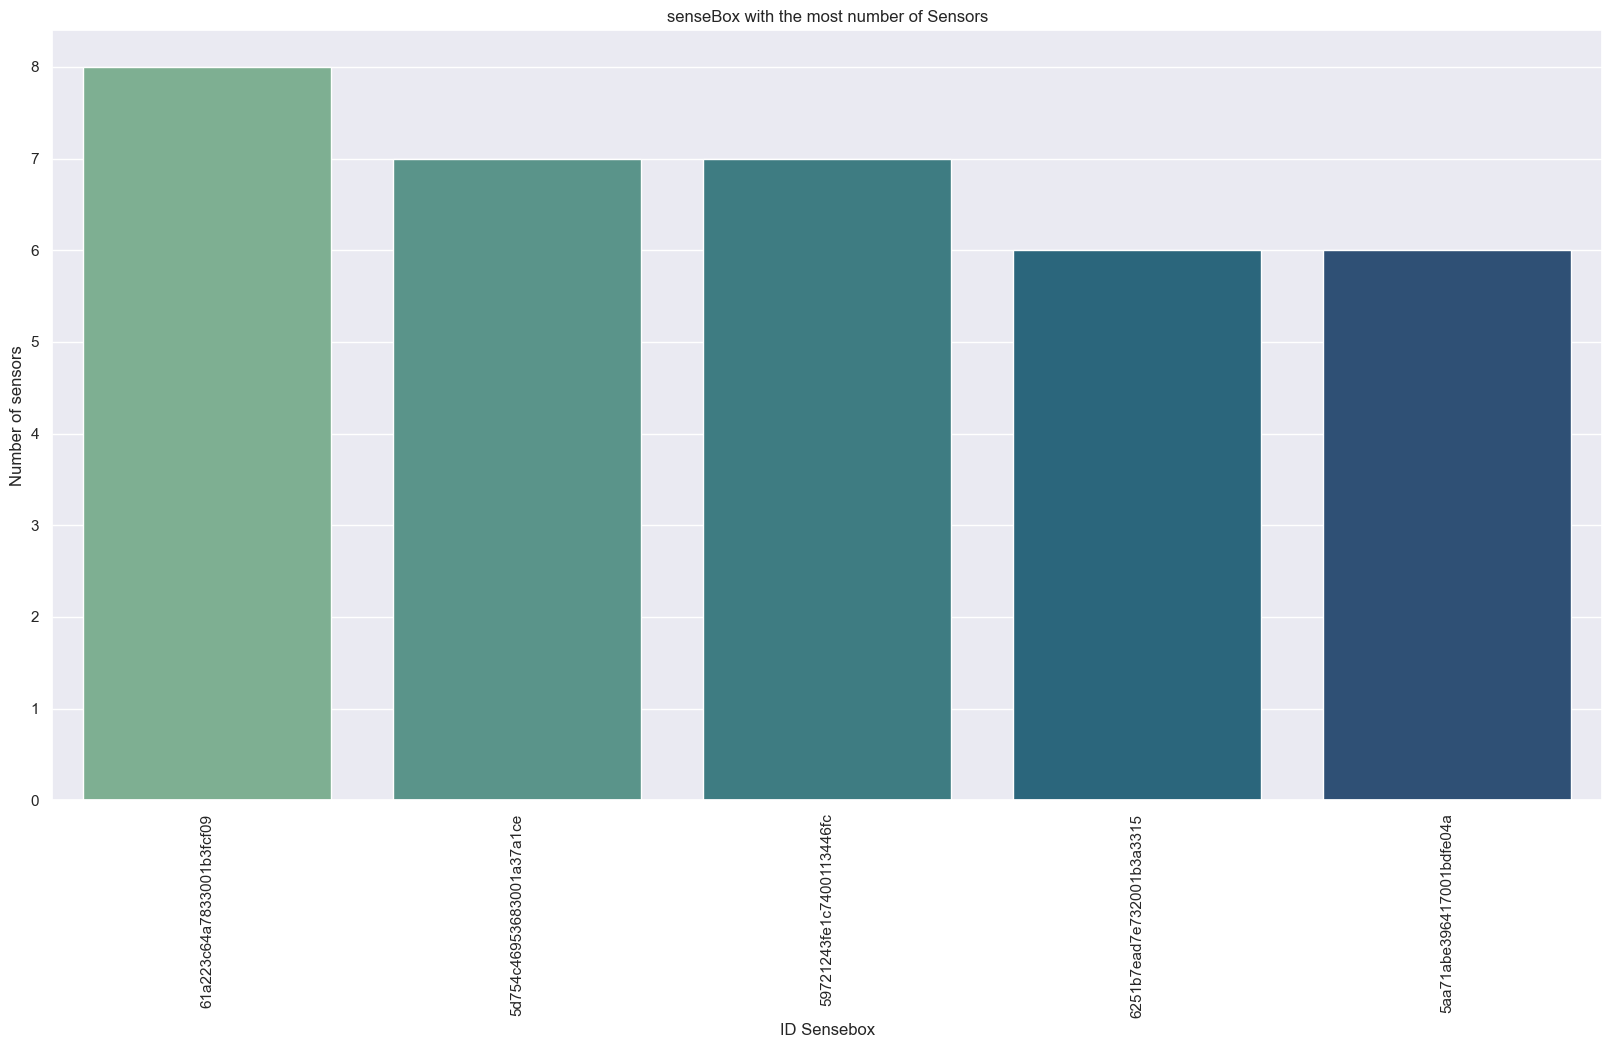

In [72]:
sns.despine(left=True)

sns.barplot(data=data_plot, x='id_sensebox',y='total_sensors', palette='crest', hue='id_sensebox')
plt.xticks(rotation=90)
# Formating plot
plt.title('senseBox with the most number of Sensors')
plt.ylabel('Number of sensors')
plt.xlabel('ID Sensebox')


__Which variables reported by the sensebox's sensors for the Temperature phenomenon have a high correlation of occurrying?__

The data in the sensors requires that we transpose the data, so we have variables in columns for each measurement value and per sensebox. To do so, we use the function pivot, to keep the senseBox identifier. 

In [73]:
df_sensors.columns

Index(['title', 'unit', 'sensorType', 'icon', '_id', 'm_value', 'm_date',
       'id_sensebox'],
      dtype='object')

In [75]:
df_sensors['m_value'] = pd.to_numeric(df_sensors['m_value'], errors='coerce')

In [77]:
df_sensors['m_value'].fillna(0)  

0         4.00000
1         2.23000
2        23.39000
3        29.73000
4     95091.63000
         ...     
67       99.90001
68     1010.60200
69        2.60000
70       16.00000
71        0.13000
Name: m_value, Length: 72, dtype: float64

In [87]:
df_sensor_m_data=pd.pivot_table(data=df_sensors, index=['id_sensebox','sensorType','m_date'], columns='title',values='m_value', fill_value=None)

Reviewing the output data, it is easier to evidenciate that some variables don't have enough data to be relevant to the analysis. We will reduce them to the ones in which the null values are lower than 90% of the sample to reduce their impact on the data. 

In [89]:
df_sensor_m_data.shape

(42, 11)

In [88]:
df_sensor_m_data.isna().sum()

title
Humidity         27
PM10             33
PM2.5            33
Pressure         34
Temperature      27
battery          40
dewpoint         41
fCnt             39
light            41
motion           40
radioactivety    41
dtype: int64

In [90]:
df_sensor_m_data.head()
df_sensor_m_data.drop(columns=['light', 'radioactivety','dewpoint','motion','fCnt','battery'], axis=1, inplace=True)

Text(0.5, 77.24999999999999, 'Environmental Variable')

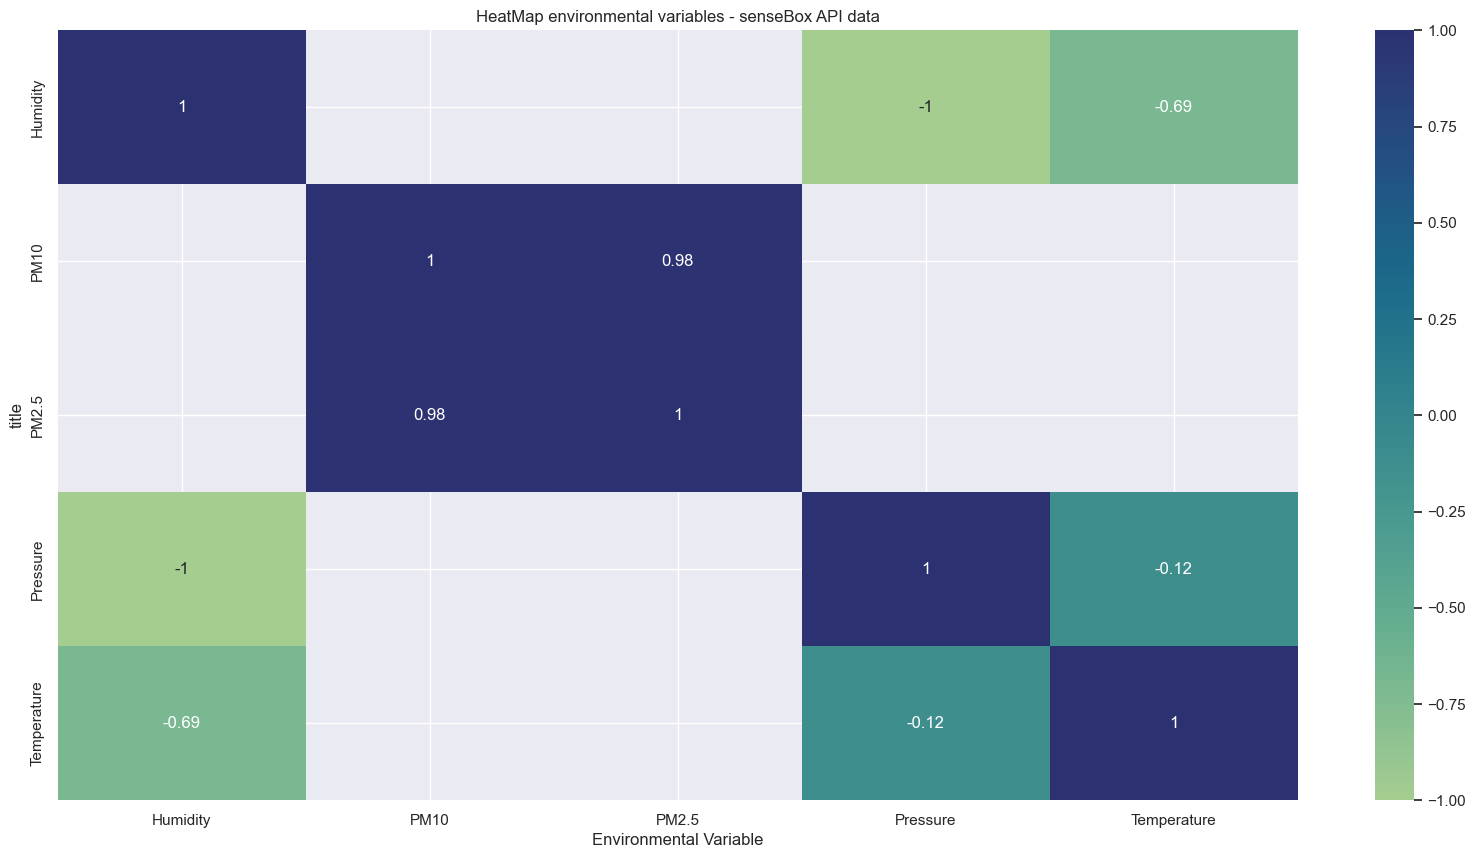

In [91]:
sns.heatmap(df_sensor_m_data.corr(), cmap='crest', annot=True).set(title='HeatMap environmental variables - senseBox API data')
plt.xlabel("Environmental Variable")

The heatmap illustrates a high negative correlation between _humidity and temperature_,  low negative correlation between _pressure and temperature_, and a high positive correlation between _PM2.5 and PM10_. Nevertheless, this is also an indication than it is necessary to extract more data per station to elaborate a robust analysis about how enviromental variables are correlated, which will be analysed in [Part B](assignment-part-b.html).

## References

- [openSenseMap - senseBox](https://opensensemap.org/)
- [senseBox product overview](https://sensebox.de/de/products.html)
- [openSenseMap API](https://docs.opensensemap.org/)

__Coding references__

- [Attribute Error Handling](https://www.geeksforgeeks.org/python-attributeerror/)
- [Conditional List Comprehension Stackoverflow](https://stackoverflow.com/questions/4260280/if-else-in-a-list-comprehension)
- [Dataframes documentation](https://www.geeksforgeeks.org/)
- [ipyleaflet Map Library](https://ipyleaflet.readthedocs.io/en/latest/)
- [ipyleaflet Examples](https://github.com/jupyter-widgets/ipyleaflet/tree/master/examples)
- [Jupyter Widget Integration](https://ipywidgets.readthedocs.io/en/latest/embedding.html#embedding-jupyter-widgets-in-other-contexts-than-the-notebook)
- [Jupyter Warning off](https://jupyterbook.org/en/stable/reference/cli.html?highlight=warning%20off#cmdoption-jupyter-book-build-q)
- [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
- [Pandas Dataframe documentation](https://sparkbyexamples.com/pandas/)
- [Pandas Dataframe Documentation](https://pandas.pydata.org/docs/reference/frame.html)
- [Seaborn Documentation](https://seaborn.pydata.org/index.html)